# SMA Crossover Strategy Backtest

This notebook demonstrates how to implement and backtest a Simple Moving Average (SMA) crossover strategy using the Quantlib framework.

## Strategy Overview
The SMA crossover strategy is a trend-following strategy that generates trading signals based on the intersection of two moving averages:
- Buy when the shorter-term SMA crosses above the longer-term SMA
- Sell when the shorter-term SMA crosses below the longer-term SMA

We'll also include realistic trading costs:
- Commission: 0.2% per trade (typical for crypto exchanges)
- Slippage: 0.1% (conservative estimate for liquid markets)

## Setup and Imports
First, let's import the necessary modules and check our Python environment:

In [55]:
import sys
print(f"Using Python from: {sys.executable}")

from Quantlib.visualization.visualize import (
    plot_equity_curve,
    plot_drawdown,
    plot_signals,
    save_trade_log
)

from Quantlib.strategies.sma_crossover import SMACrossover
from Quantlib.backtest.engine import run_backtest
import os
import pandas as pd

Using Python from: /opt/anaconda3/bin/python


## Configure Trading Costs

Let's set up our commission and slippage parameters to make the backtest more realistic:

## Running the Backtest

Now we'll run the backtest with the following parameters:
- Initial capital: $100,000
- Trade size: 10% of portfolio per trade
- Data: BTC daily prices

First, let's verify our data:

In [56]:
# Verify data file exists and peek at the data
data_path = "../data/BTC-Daily.csv"
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}. Please check the file path.")

# Read first few rows of data
df_preview = pd.read_csv(data_path, nrows=5)
print("Preview of the data:")
print(df_preview)
print("\nColumns available:", df_preview.columns.tolist())

Preview of the data:
         unix             datetime   symbol      open      high       low  \
0  1646092800  2022-03-01 00:00:00  BTC/USD  43221.71  43626.49  43185.48   
1  1646006400  2022-02-28 00:00:00  BTC/USD  37717.10  44256.08  37468.99   
2  1645920000  2022-02-27 00:00:00  BTC/USD  39146.66  39886.92  37015.74   
3  1645833600  2022-02-26 00:00:00  BTC/USD  39242.64  40330.99  38600.00   
4  1645747200  2022-02-25 00:00:00  BTC/USD  38360.93  39727.97  38027.61   

      close       Volume    Volume USD  
0  43185.48    49.006289  2.116360e+06  
1  43178.98  3160.618070  1.364723e+08  
2  37712.68  1701.817043  6.418008e+07  
3  39146.66   912.724087  3.573010e+07  
4  39231.64  2202.851827  8.642149e+07  

Columns available: ['unix', 'datetime', 'symbol', 'open', 'high', 'low', 'close', 'Volume', 'Volume USD']


Now that we've verified our data, let's run the backtest with trading costs:

In [ ]:
print("Running backtest...")
# Create a copy of the settings for the broker

# Define commission and slippage settings
commission_scheme = {
    'commission': 0.002,  # 0.2% trading fee
    'margin': None,      # No margin trading
    'mult': 1.0,        # No leverage
}

slippage_scheme = {
    'slip_perc': 0.001,  # 0.1% slippage
    'slip_fixed': 0.0,   # No fixed slippage
    'slip_open': True,   # Apply slippage on open orders
}
# broker_kwargs = {
#     'commission_scheme': commission_scheme,
#     'slippage_scheme': slippage_scheme
# }

# Run backtest with only strategy parameters
df, trades,performance = run_backtest(
    strategy_class=SMACrossover,  # Using SMACrossover strategy class
    data_path=data_path,
    cash=100000,
    plot=True,
    kwargs={
        'trade_size': 0.1,  # Trading with 10% of portfolio
        'commission_scheme': commission_scheme,  # Add commission settings
        'slippage_scheme': slippage_scheme  # Add slippage settings
    }
)
print("\nBacktest completed successfully!")

Running backtest...
Index(['unix', 'datetime', 'symbol', 'open', 'high', 'low', 'close', 'volume',
       'volume usd'],
      dtype='object')
2015-02-03 BUY EXECUTED, 237.97
2015-02-04 SELL EXECUTED, 227.35
2015-02-20 BUY EXECUTED, 240.59
2015-03-25 SELL EXECUTED, 246.93
2015-05-07 BUY EXECUTED, 229.78
2015-05-28 SELL EXECUTED, 235.34
2015-05-30 BUY EXECUTED, 236.02
2015-05-31 SELL EXECUTED, 232.07
2015-06-18 BUY EXECUTED, 245.78
2015-08-08 SELL EXECUTED, 279.01
2015-09-13 BUY EXECUTED, 235.61
2015-09-22 SELL EXECUTED, 226.15
2015-10-02 BUY EXECUTED, 237.15
2015-11-20 SELL EXECUTED, 326.51
2015-12-03 BUY EXECUTED, 359.11
2016-01-04 SELL EXECUTED, 430.79
2016-01-12 BUY EXECUTED, 448.00
2016-01-16 SELL EXECUTED, 360.00
2016-02-17 BUY EXECUTED, 407.51
2016-03-11 SELL EXECUTED, 416.00
2016-03-30 BUY EXECUTED, 415.43
2016-05-20 SELL EXECUTED, 436.30
2016-05-29 BUY EXECUTED, 522.13
2016-07-02 SELL EXECUTED, 674.55
2016-07-03 BUY EXECUTED, 702.48
2016-07-08 SELL EXECUTED, 638.89
2016-07-20 B

ValueError: not enough values to unpack (expected 3, got 2)

## Analyzing Results
Let's examine the backtest results through different visualizations:

### 1. Performance Metrics

In [59]:
# Print all performance metrics
performance.print_all()

NameError: name 'performance' is not defined

### 2. Equity Curve
The equity curve shows how our portfolio value changes over time:

Plotting equity curve...


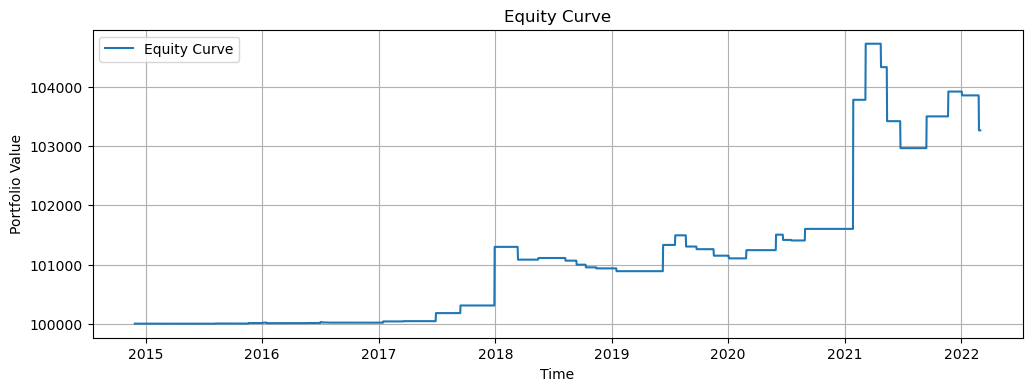

In [ ]:
print("Plotting equity curve...")
plot_equity_curve(df["equity"])

### 3. Drawdown Analysis
The drawdown chart helps us understand the risk profile of our strategy:

Plotting drawdown...


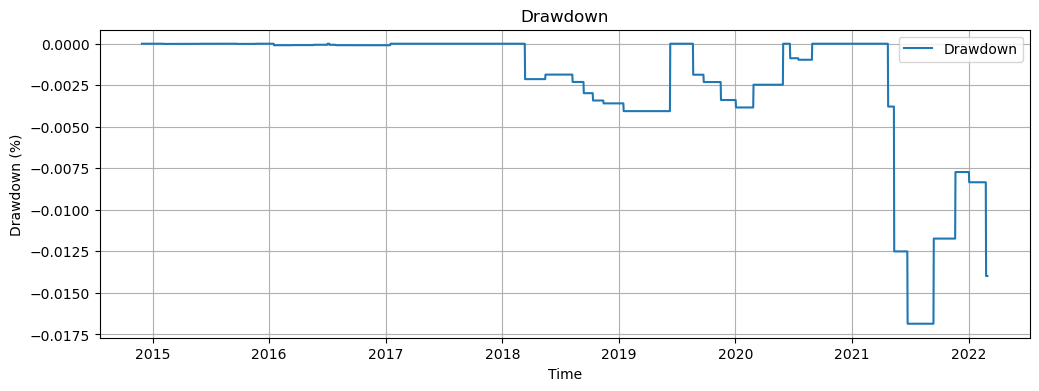

In [ ]:
print("Plotting drawdown...")
plot_drawdown(df["equity"])

### 4. Trade Signals
Let's visualize when the strategy entered and exited positions:

Plotting trade signals...


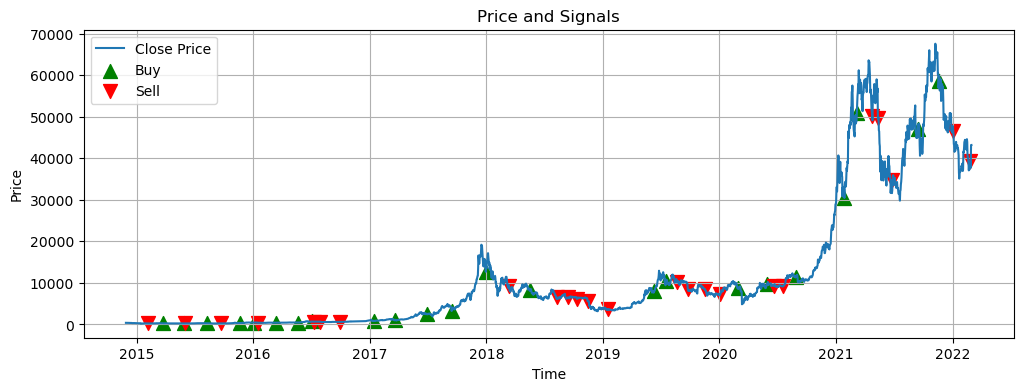

In [ ]:
print("Plotting trade signals...")
plot_signals(df, df.get("buy_signal"), df.get("sell_signal"))

### 5. Trade Log
Finally, let's save the detailed trade log for further analysis:

In [ ]:
print("Saving trade log...")
save_trade_log(trades)

# Show the first few trades
trades_df = pd.DataFrame(trades)
if not trades_df.empty:
    print("\nFirst 5 trades:")
    print(trades_df.head())

Saving trade log...
✅ Trade log saved to: trades_log.csv

First 5 trades:
    datetime   price  size    pnl  commission   pnlcomm
0 2015-02-04  237.97   0.0 -1.062    0.093064 -1.155064
1 2015-03-25  240.59   0.0  0.634    0.097504  0.536496
2 2015-05-28  229.78   0.0  0.556    0.093024  0.462976
3 2015-05-31  236.02   0.0 -0.395    0.093618 -0.488618
4 2015-08-08  245.78   0.0  3.323    0.104958  3.218042


## Next Steps

To improve the strategy, you might want to:
1. Adjust the SMA periods
2. Modify the position sizing
3. Add stop-loss and take-profit rules
4. Test on different timeframes or assets 